## STAT1020 PROJECT WORK. GROUP 3


In [10]:
#importing python libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import QuantileTransformer
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [9]:
#Reading csv file into Pandas DataFrame
df = pd.read_csv('melb_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'melb_data.csv'

In [12]:
import os
print(os.getcwd())


/


In [3]:
#Structure of dataframe
df.head()

NameError: name 'df' is not defined

In [20]:
#Dropping columns not in use
df.drop(columns={"Date", "Bathroom","Landsize", "Address","Method","Date","Postcode","Bathroom","Car","YearBuilt","CouncilArea","Propertycount", "Suburb","Bedroom2"}, inplace=True)

In [21]:
df.head()

,Type,Price,SellerG,Distance,BuildingArea,Lattitude,Longtitude,Regionname
0,h,1480000.0,Biggin,2.5,NaN,-37.7996,144.9984,Northern Metropolitan
1,h,1035000.0,Biggin,2.5,79.0,-37.8079,144.9934,Northern Metropolitan
2,h,1465000.0,Biggin,2.5,150.0,-37.8093,144.9944,Northern Metropolitan
3,h,850000.0,Biggin,2.5,NaN,-37.7969,144.9969,Northern Metropolitan
4,h,1600000.0,Nelson,2.5,142.0,-37.8072,144.9941,Northern Metropolitan


In [22]:
#Dropping NaN values
df.dropna(inplace=True)

In [24]:
#Converting Price from AUD to USD
df['Price_USD'] = df['Price'] * 0.74

In [ ]:
#Changing name from Longtitude to Longitude
df.drop(columns="Area_m2",inplace=True)

In [ ]:
df.head()

,Type,Distance,Regionname,lat,lon,Price_usd,Area_sq_meter,Price_USD,BuildingArea
1,h,2.5,Northern Metropolitan,-37.8079,144.9934,765900.0,6241.0,566766.0,NaN
2,h,2.5,Northern Metropolitan,-37.8093,144.9944,1084100.0,22500.0,802234.0,2250.0
4,h,2.5,Northern Metropolitan,-37.8072,144.9941,1184000.0,20164.0,876160.0,2016.4
6,h,2.5,Northern Metropolitan,-37.8024,144.9993,1388240.0,44100.0,1027297.6,4410.0
7,h,2.5,Northern Metropolitan,-37.8060,144.9954,1210640.0,11449.0,895873.6,NaN


Text(0.5, 1.0, 'Relationship betweeen Land Area [Sq Meters] and Property_Price [USD] ')

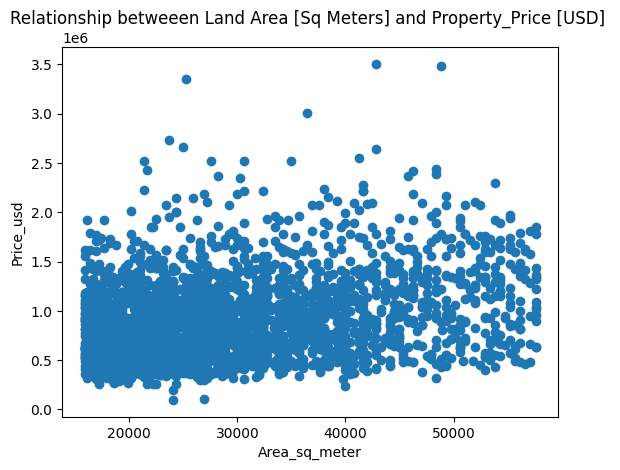

In [ ]:
#Scatter plot to show the correlation between BuildingArea and Property price
plt.scatter(x=df_filtered["Area_sq_meter"], y=df_filtered["Price_usd"])
plt.xlabel("Area_sq_meter")
plt.ylabel("Price_usd")
plt.title("Relationship betweeen Land Area [Sq Meters] and Property_Price [USD] ")


In [ ]:
#Finding Spearman correlation efficient of Price_usd and BuildingArea in aquare meters
df_filtered["Area_sq_meter"].corr(df["Price_USD"], method="spearman")


0.3054862861702415

In [25]:
#Pie chart showing the mean price of property based on the type of property
mean_prices = df.groupby('Type')['Price_USD'].mean()

# Create 3D pie chart
fig = go.Figure(data=[go.Pie(
    labels=mean_prices.index,
    values=mean_prices,
    hole=0.3  # To make it a donut chart, remove this line if you want a standard pie chart
)])

fig.update_traces(textinfo='percent+label')

fig.update_layout(
    title='Mean Price Distribution by Region',
    margin=dict(t=0, b=0, l=0, r=0),
    showlegend=True
)

# Show plot
fig.show()

: 

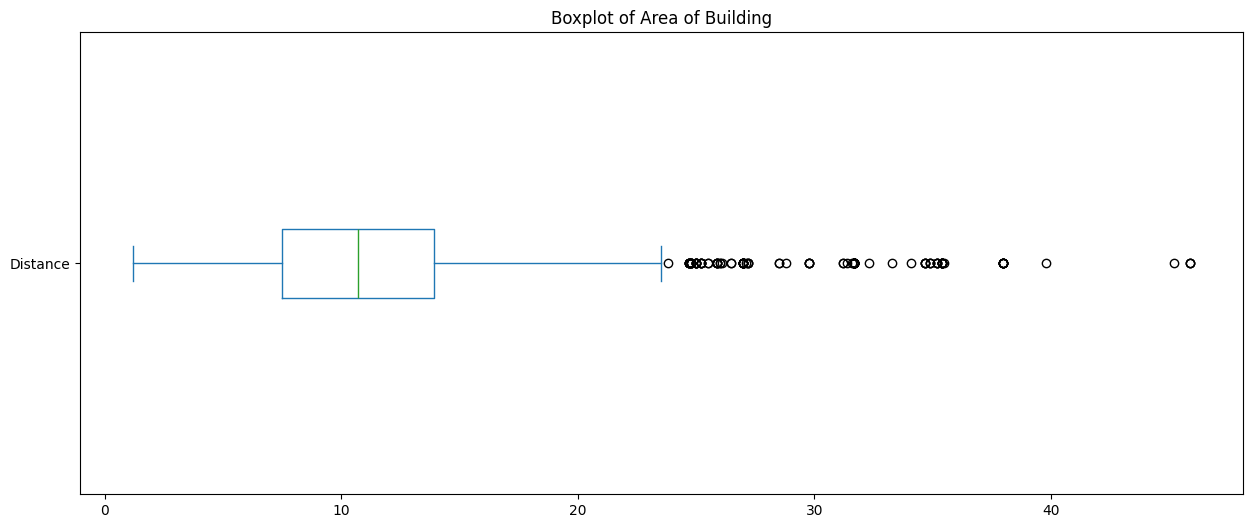

In [ ]:
fig, ax =plt.subplots(figsize=(15,6))
df_filtered["Distance"].plot(kind="box", vert=False, title="Boxplot of Area of Building", ax=ax);



In [ ]:
desc = df['Distance'].describe(percentiles=[.25, .5, .75])
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1
median = desc['50%']
minimum = df['Distance'].min()
maximum = df['Distance'].max()

#outlier
outliers = df[(df['Distance'] < Q1 - 1.5 * IQR) | (df['Distance'] > Q3 + 1.5 * IQR)]['Distance'].values

#display results
print(f"Minimum: {minimum}")
print(f"First Quartile (Q1): {Q1}")
print(f"Median: {median}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Maximum: {maximum}")
print(f"Outliers: {outliers}")


Minimum: 0.0
First Quartile (Q1): 6.1
Median: 9.2
Third Quartile (Q3): 13.0
Maximum: 48.1
Outliers: [24.7 25.9 36.9 38.  45.9 45.2 25.2 31.7 31.7 25.9 23.5 35.4 31.7 31.7
 25.5 27.2 27.  25.  25.  31.2 31.2 27.  24.7 24.7 24.7 28.8 38.  36.9
 25.2 31.7 29.8 31.7 26.5 26.5 35.4 31.7 35.2 34.9 24.8 45.9 32.3 31.7
 26.5 23.5 34.7 31.7 39.8 35.2 27.  38.  31.7 31.6 47.4 23.5 34.7 35.4
 35.2 34.9 27.1 27.  27.  24.8 25.2 31.7 29.8 31.7 35.4 31.7 25.5 35.2
 35.2 25.  25.  34.9 24.7 27.  24.8 24.8 38.  38.  33.3 31.7 31.7 28.8
 26.5 23.5 23.5 35.4 31.7 31.7 27.  27.2 35.2 34.9 27.7 45.9 26.1 31.7
 31.7 25.9 25.2 27.2 25.  25.  31.2 34.9 28.5 24.8 24.8 38.  38.  45.9
 25.2 29.8 29.8 34.1 47.3 23.5 23.5 35.4 35.4 35.4 25.5 39.  27.  24.7
 24.7 28.8 27.  24.8 31.7 41.  29.8 47.3 31.7 31.7 31.4 35.2 25.  29.8
 31.2 34.9 27.  34.7 28.8 36.9 28.5 28.5 24.8 24.8 38.  36.9 38.  25.2
 31.7 29.8 31.7 26.5 35.4 35.4 31.7 31.7 31.7 35.5 35.2 24.7 24.8 38.
 38.  38.  31.7 31.7 31.7 31.7 31.7 25.9 24.8 38.

In [ ]:
#Boxplot to visualize attribute 'Distance form CBD'
fig = px.histogram(df, x='Distance', nbins=30, histnorm='density', title='Density Plot of Distance Variable', marginal='box')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Distance (km)',
    yaxis_title='Density',
    showlegend=False
)

# Show plot
fig.show()

In [ ]:
#Subsetting 10% top and buttom values of BuildingArea
low, high = df["Area_sq_meter"].quantile([0.5, 0.9])
df_filtered= df[df["Area_sq_meter"].between(low, high)]
df["BuildingArea"]= df_filtered["Area_sq_meter"]/10
# Display the filtered data
print(df["BuildingArea"].describe())

count    2867.000000
mean     2875.607189
std      1080.624525
min      1587.600000
25%      1960.000000
50%      2560.000000
75%      3572.100000
max      5760.000000
Name: BuildingArea, dtype: float64


Range 1587.6-2087.6:

Range 2087.6-2587.6:

Range 2587.6-3087.6:

Range 3087.6-3587.6:

Range 3587.6-4087.6:

Range 4087.6-4587.6:

Range 4587.6-5087.6:

Range 5087.6-5587.6:

Range 5587.6-6087.6:

Median of entire dataset: 2560.0


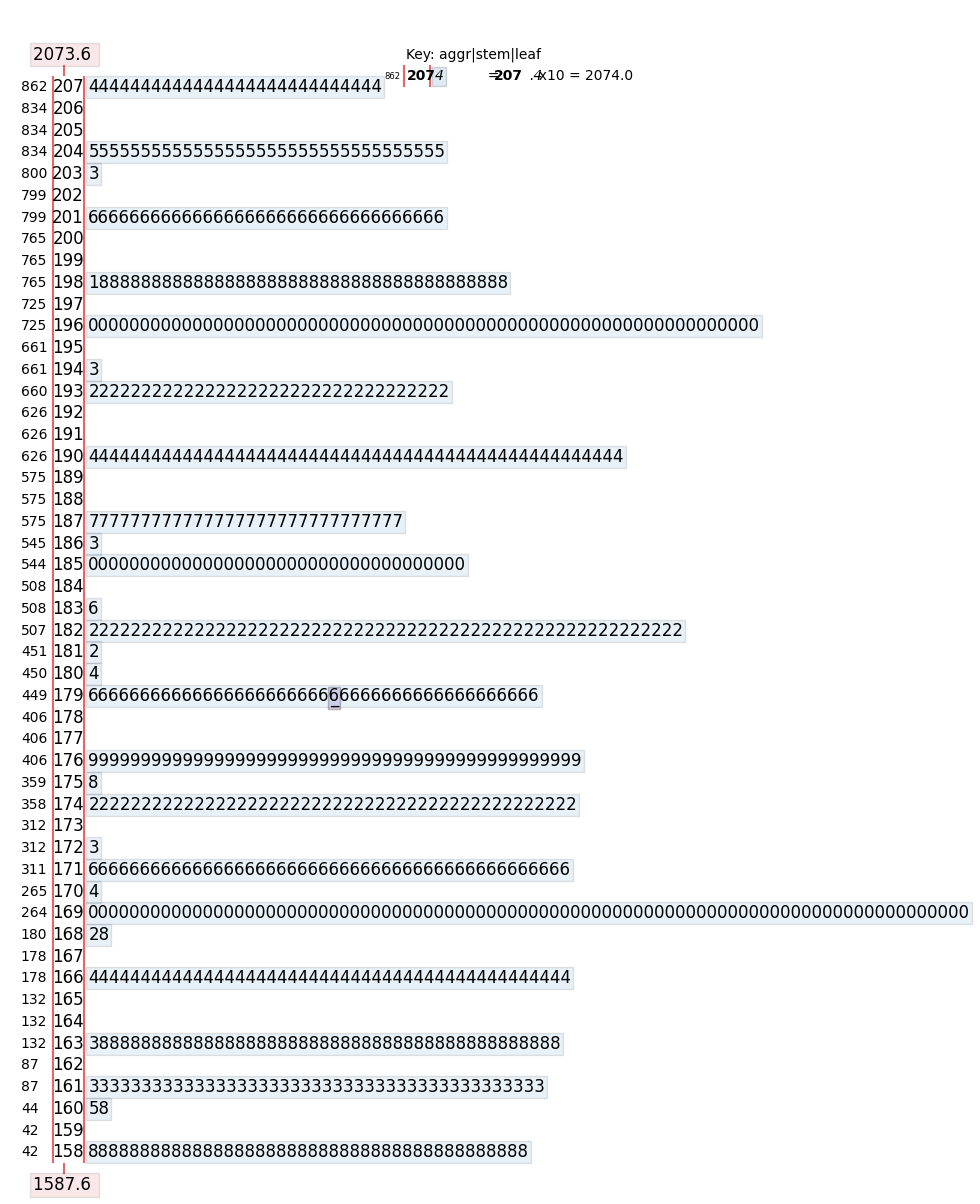

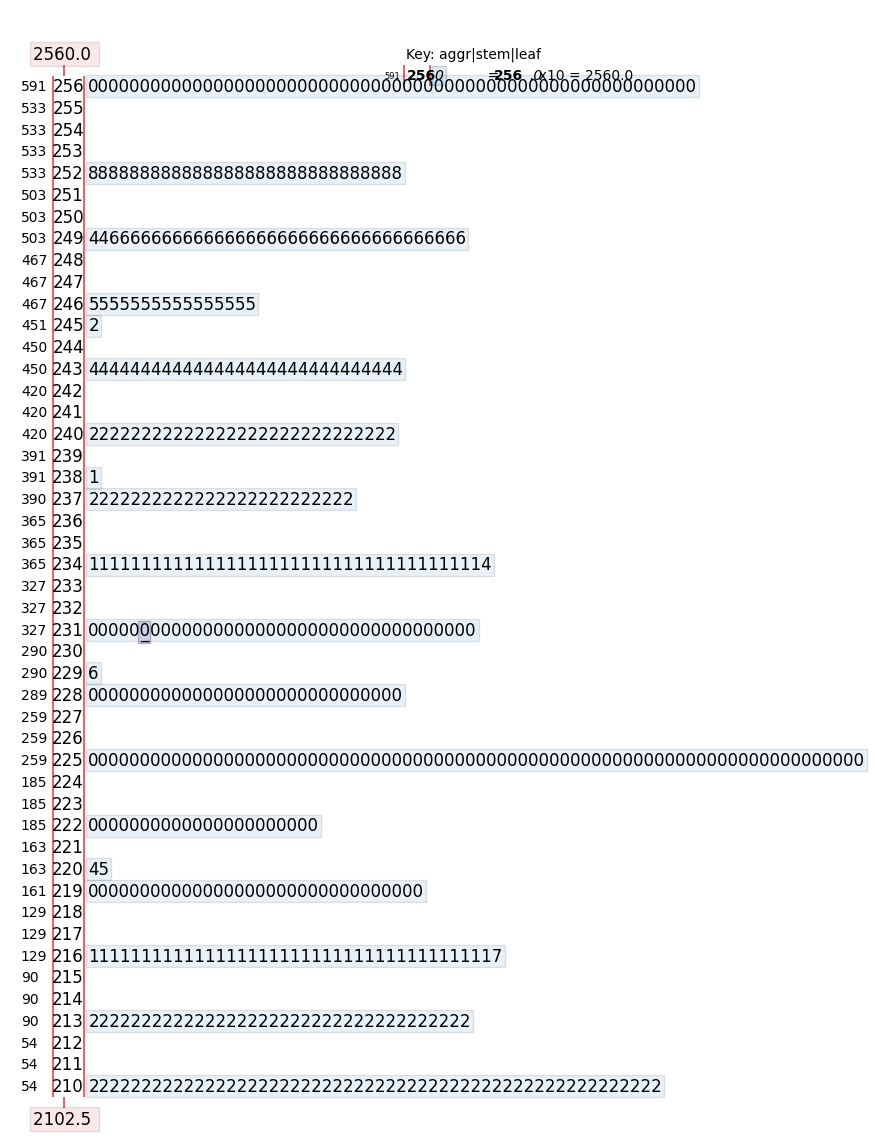

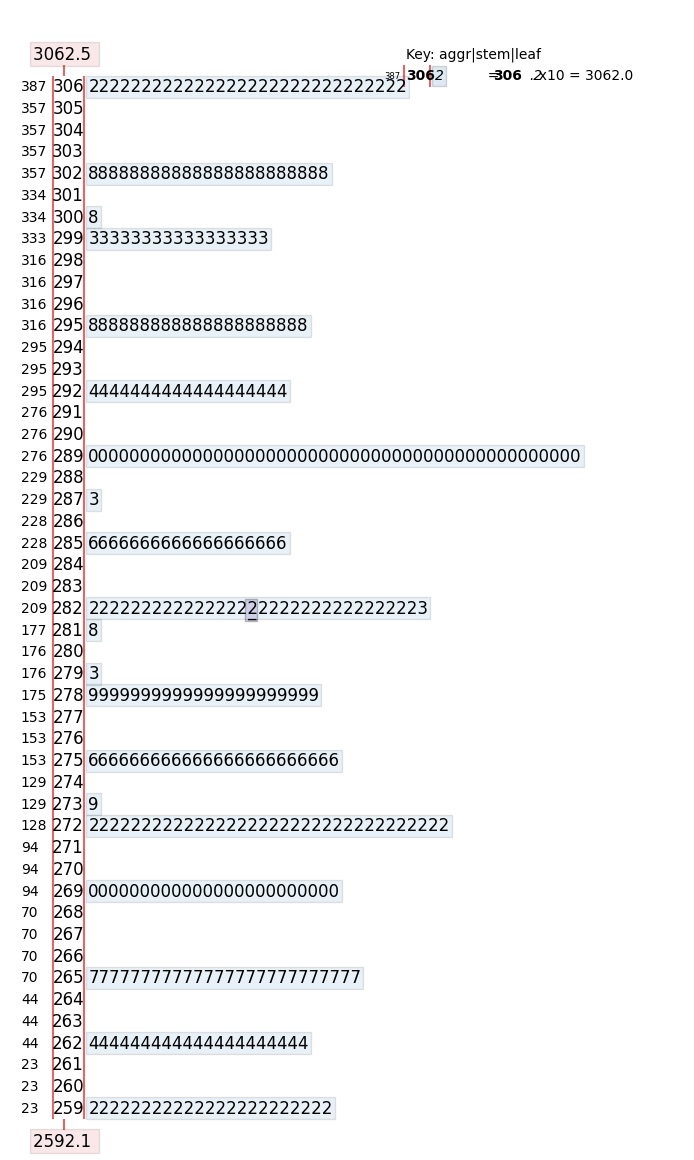

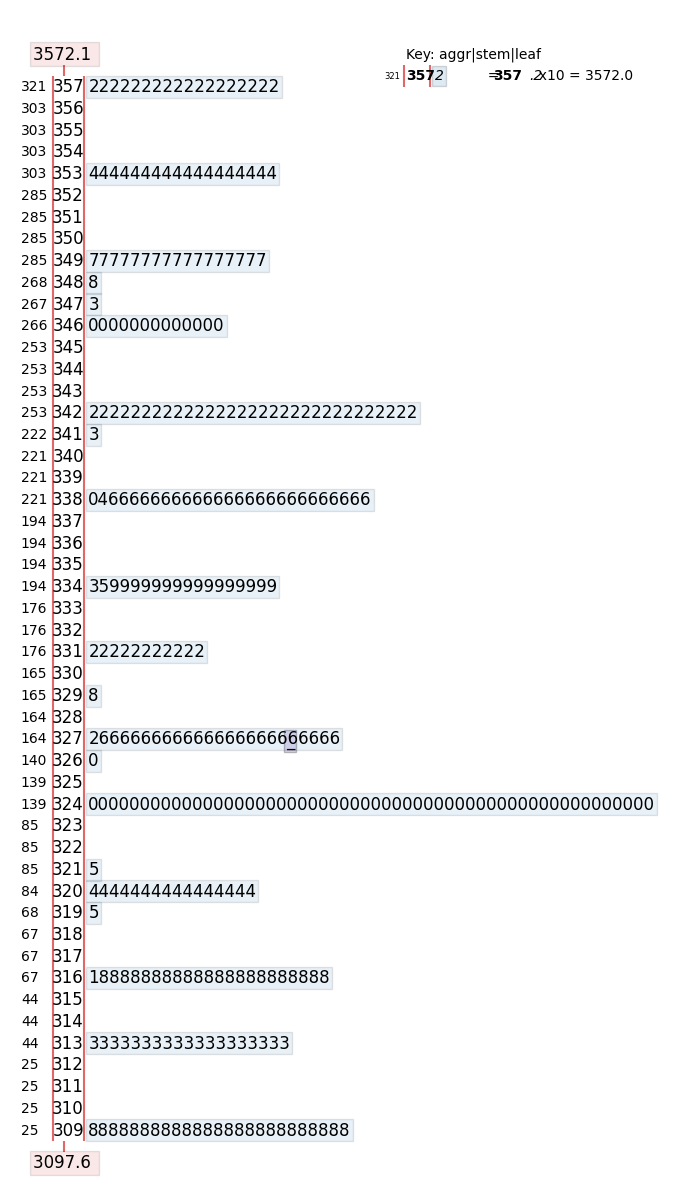

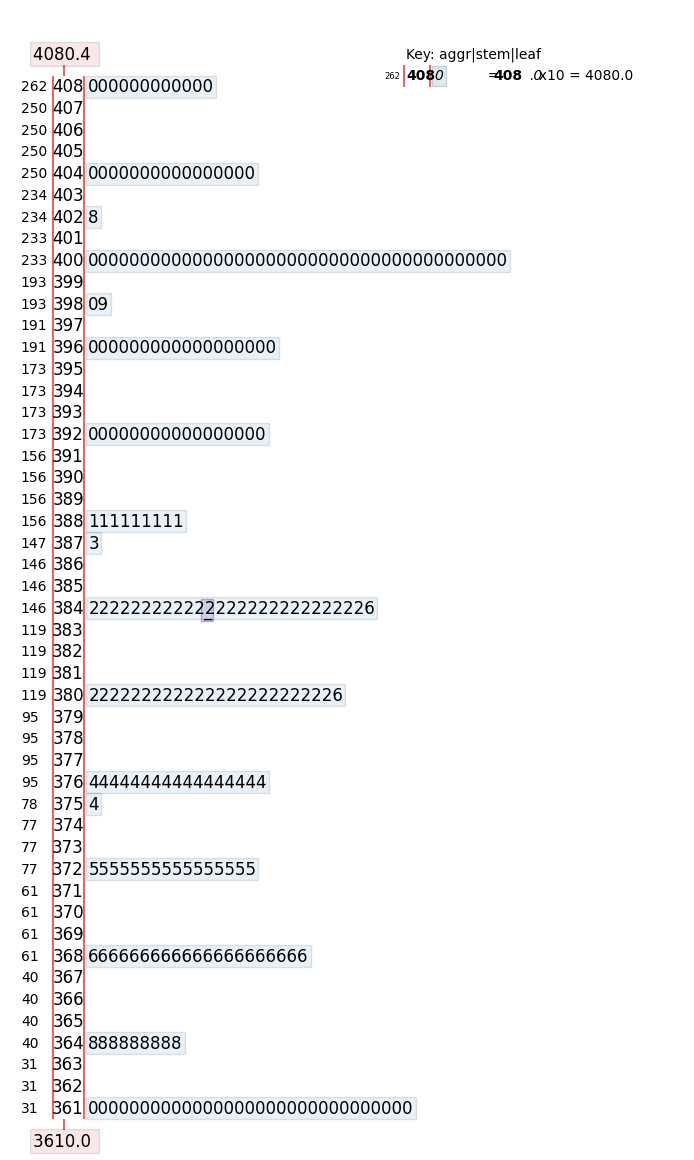

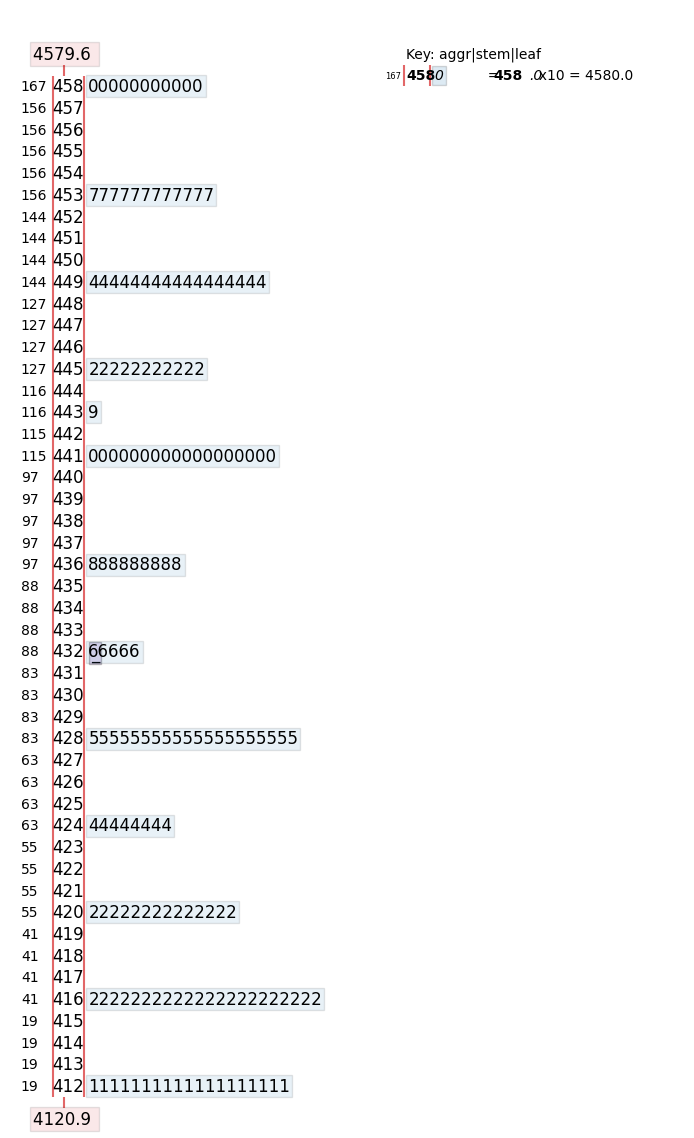

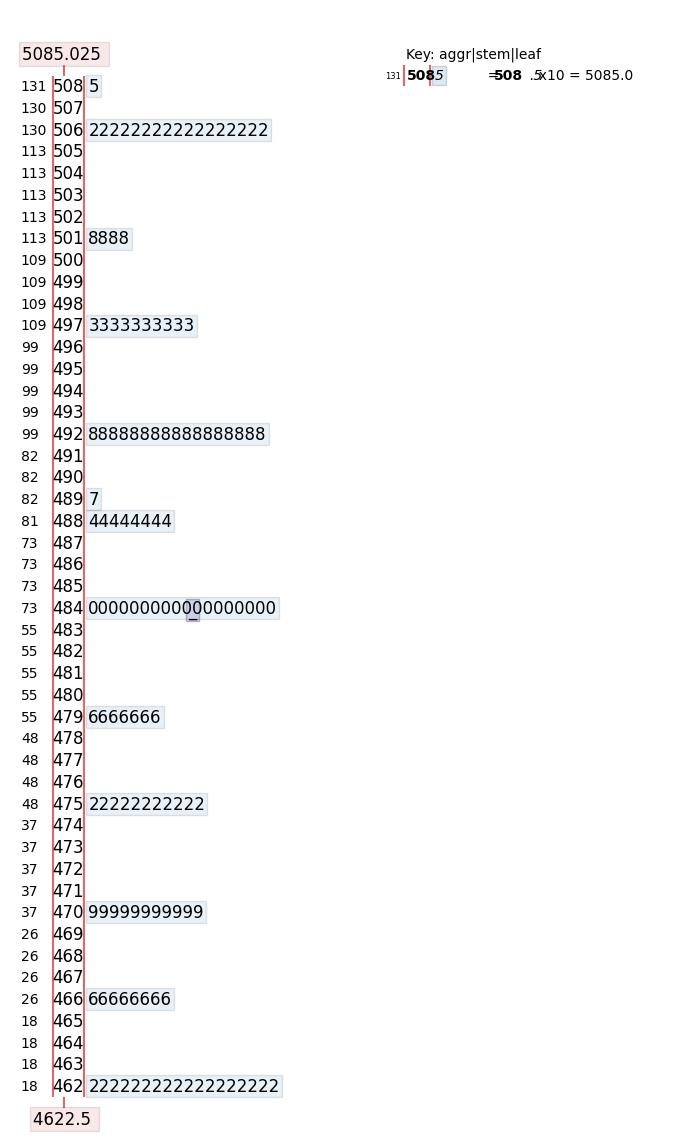

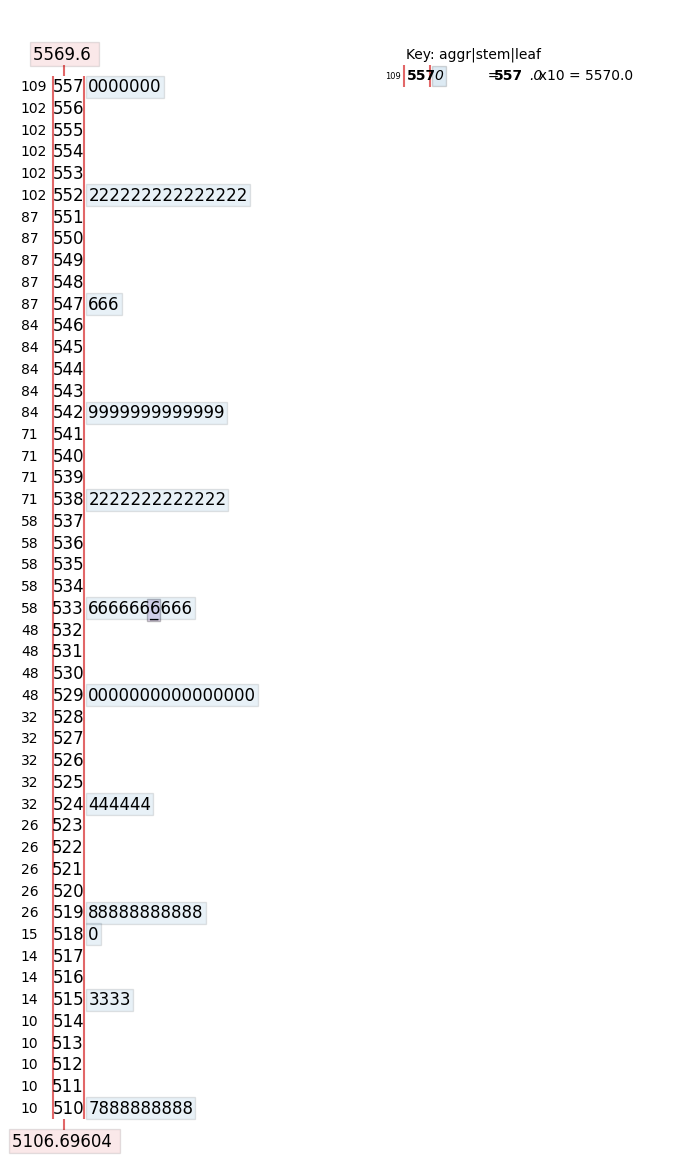

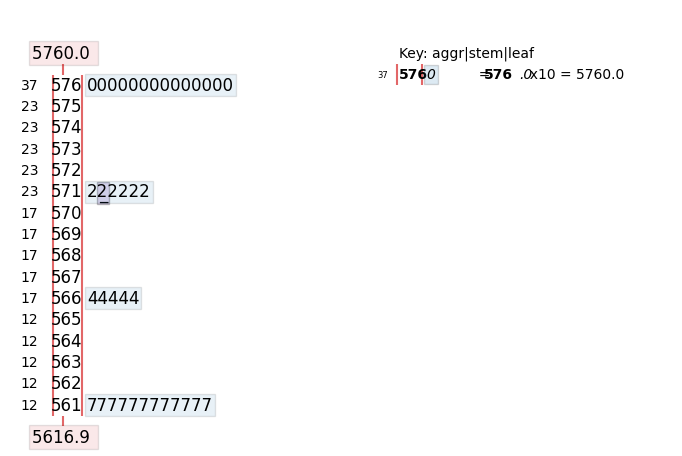

In [ ]:
# Aggregate data
def aggregate_stem_leaf(data, bin_width):
    bins = np.arange(data.min(), data.max() + bin_width, bin_width)
    digitized = np.digitize(data, bins)
    aggregated = {}
    for i in range(len(bins) - 1):
        key = f"{bins[i]}-{bins[i+1]}"
        aggregated[key] = data[digitized == i + 1]
    return aggregated

# Define bin width and aggregate
bin_width = 500
aggregated_data = aggregate_stem_leaf(df_filtered['BuildingArea'], bin_width)

# Create and display stem-and-leaf plot for aggregated data
for bin_range, values in aggregated_data.items():
    print(f"Range {bin_range}:")
    stemgraphic.stem_graphic(values, scale=10)
    print()

# Calculate and print the median of the entire dataset
print(f"Median of entire dataset: {np.median(df_filtered['BuildingArea'])}")

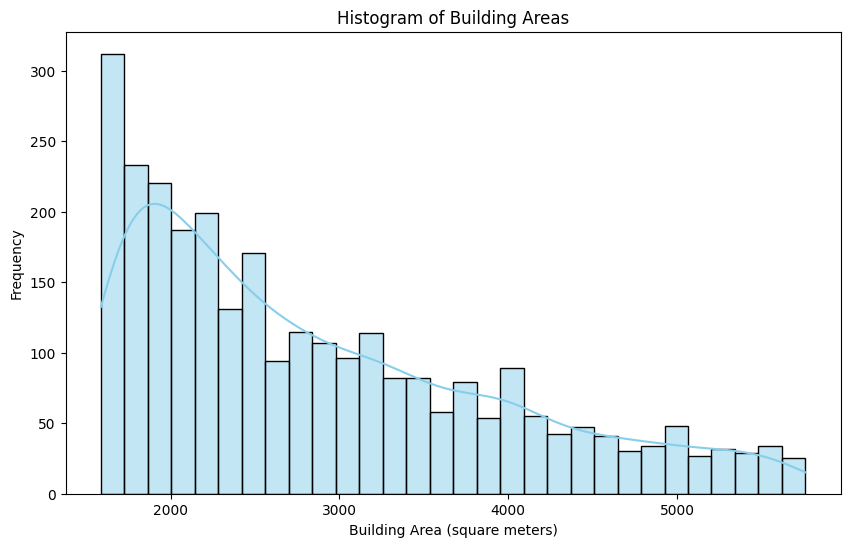

: 

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BuildingArea'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Building Areas')
plt.xlabel('Building Area (square meters)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import stat
from scipy import stats 


mean = df['BuildingArea'].mean()
median = df['BuildingArea'].median()
variance = df['BuildingArea'].var()

# Display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")

Mean: 2875.607188945156
Median: 2560.0
Variance: 1167749.3639102906


In [ ]:
df_filtered["BuildingArea"].mode()

0    1690.0
Name: BuildingArea, dtype: float64

In [ ]:
#Descriptive statistics of "BuildingArea"
df["BuildingArea"].dropna(inplace=True)
df["BuildingArea"].head()

1       NaN
2    2250.0
4    2016.4
6    4410.0
7       NaN
Name: BuildingArea, dtype: float64

In [ ]:
fig =px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    width=400,
    height=400,
    color="Price_usd",
    hover_data=["Price_usd"]
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:

fig =px.scatter_3d(
    df,
    x='lat',
    y='lon',
    z="Price_usd",
    labels={"lon": "longitude","lat":"latitude","Price_usd":"Price of Property"},
    width=900,
    height=900,
)
fig.update_traces(marker={"size":4, "line": {"width":2, "color": "DarkGrey"}}, selector={"mode":"markers"})
#display figure 
fig.show()

In [ ]:
#analysing price according to property type
mean_price_by_type = df.groupby("Regionname")["Price_usd"].mean().sort_values(ascending=False)
df[["Price_usd"]].style.format("{:.0f}")
mean_price_by_type.head(10)

Regionname
Southern Metropolitan         1.043705e+06
Eastern Metropolitan          8.265258e+05
South-Eastern Metropolitan    6.950531e+05
Northern Metropolitan         6.500155e+05
Western Metropolitan          6.460136e+05
Eastern Victoria              5.096376e+05
Northern Victoria             4.442643e+05
Western Victoria              3.017438e+05
Name: Price_usd, dtype: float64

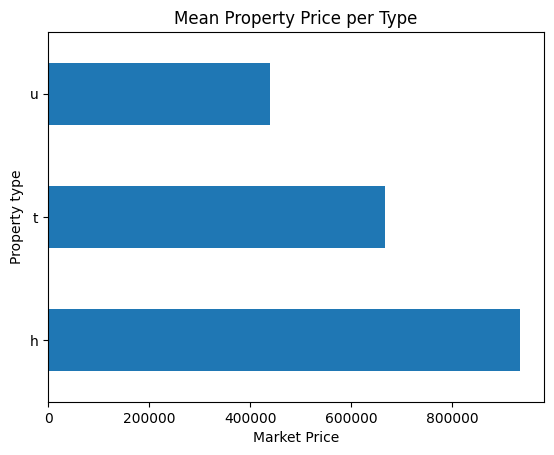

In [ ]:
mean_price_by_type.plot(
    kind="barh",
    xlabel="Market Price",
    ylabel="Property type",
    title="Mean Property Price per Type",
);

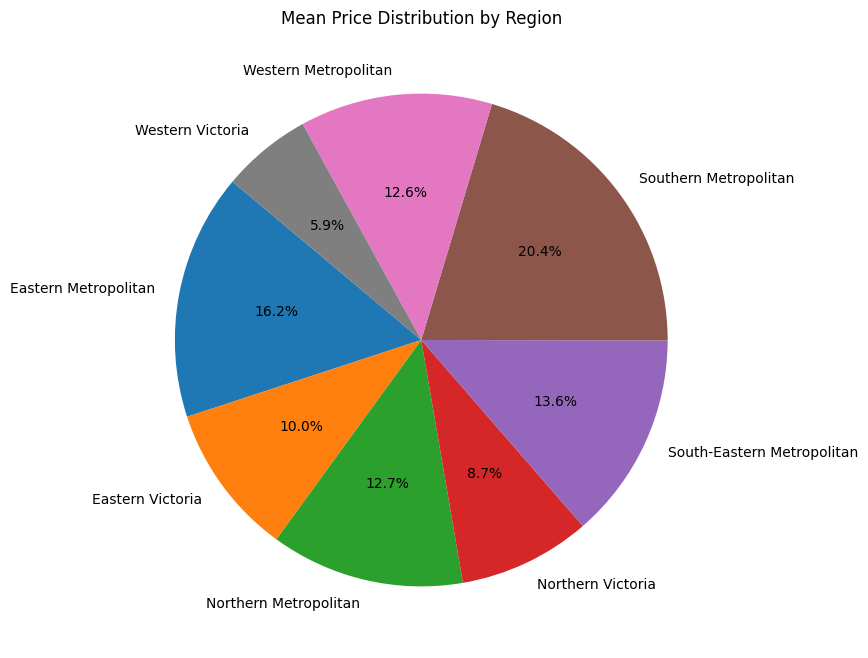

In [ ]:
mean_prices = df.groupby('Regionname')['Price_usd'].mean()
plt.figure(figsize=(8, 8))
plt.pie(mean_prices, labels=mean_prices.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Price Distribution by Region')
plt.show()

In [14]:
mean_prices = df.groupby('Type')['Price_USD'].mean()

# Create 3D pie chart
fig = go.Figure(data=[go.Pie(
    labels=mean_prices.index,
    values=mean_prices,
    hole=0.3  # To make it a donut chart, remove this line if you want a standard pie chart
)])

fig.update_traces(textinfo='percent+label')

fig.update_layout(
    title='Mean Price Distribution by Region',
    margin=dict(t=0, b=0, l=0, r=0),
    showlegend=True
)

# Show plot
fig.show()

KeyError: 'Column not found: Price_USD'

In [ ]:
df["Price_usd"].describe()

count    7.130000e+03
mean     7.991428e+05
std      4.992722e+05
min      9.694000e+04
25%      4.669400e+05
50%      6.623000e+05
75%      9.879000e+05
max      6.660000e+06
Name: Price_usd, dtype: float64

In [ ]:
#analysing price according to property type
mean_price_by_region = df.groupby("Regionname")["Price_usd"].mean().sort_values(ascending=False)
df[["Price_usd"]].style.format("{:.0f}")
mean_price_by_type.head(10)

Type
h    935245.957169
t    667507.453353
u    438562.387967
Name: Price_usd, dtype: float64

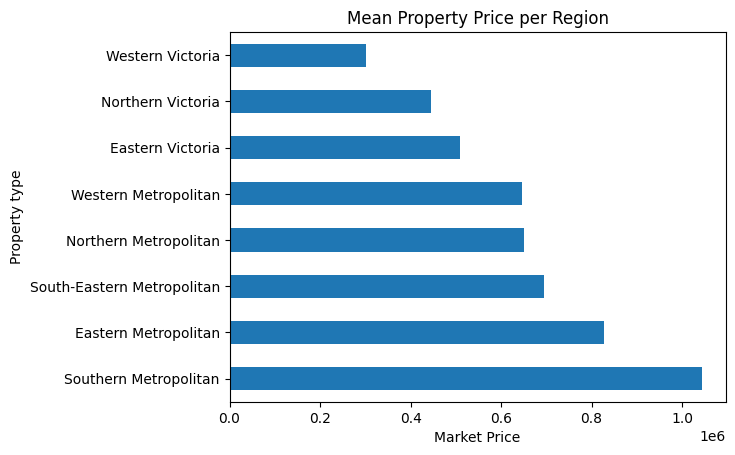

In [ ]:
mean_price_by_region.plot(
    kind="barh",
    xlabel="Market Price",
    ylabel="Property type",
    title="Mean Property Price per Region",
);

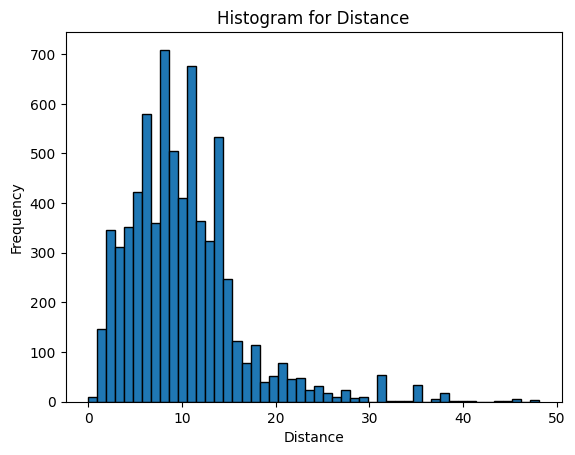

In [ ]:
#Creating box plot for "Landsize" variable (Attribute)
plt.hist(df['Distance'], bins=50, edgecolor='k')
plt.title('Histogram for Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

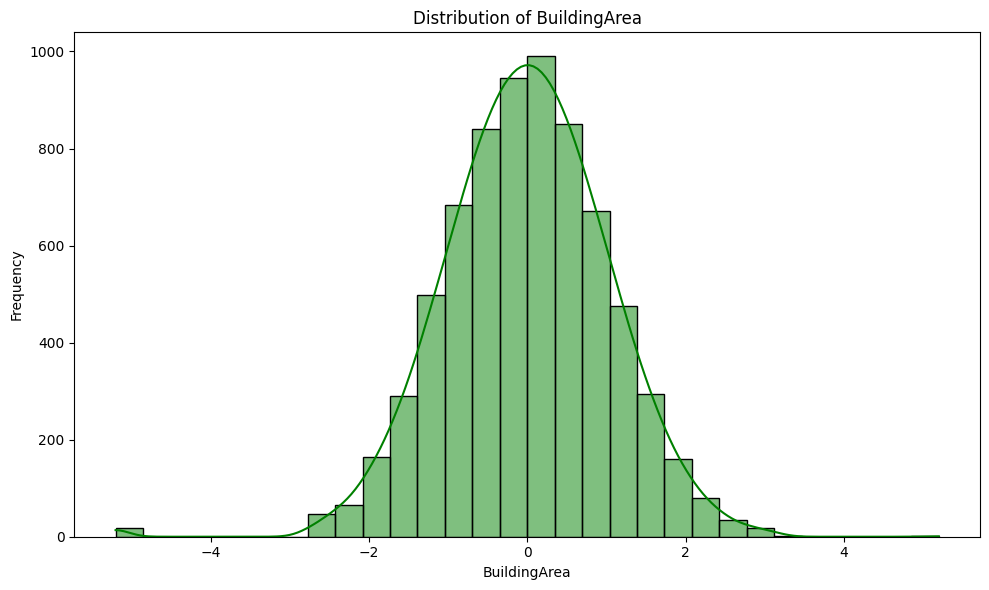

In [12]:
#Normalized plot of 'Landsize'
plt.figure(figsize=(10, 6))
sns.histplot(df['BuildingArea'], kde=True, bins=30, color='green')
plt.title('Distribution of BuildingArea')
plt.xlabel('BuildingArea')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
# Applying Quantile Transformation to follow a normal distribution
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df['BuildingArea'] = quantile_transformer.fit_transform(df['BuildingArea'].values.reshape(-1, 1)).flatten()
print(f"Skewness after Quantile Transformation: {df['BuildingArea'].skew():.5f}")

Skewness after Quantile Transformation: -0.22466


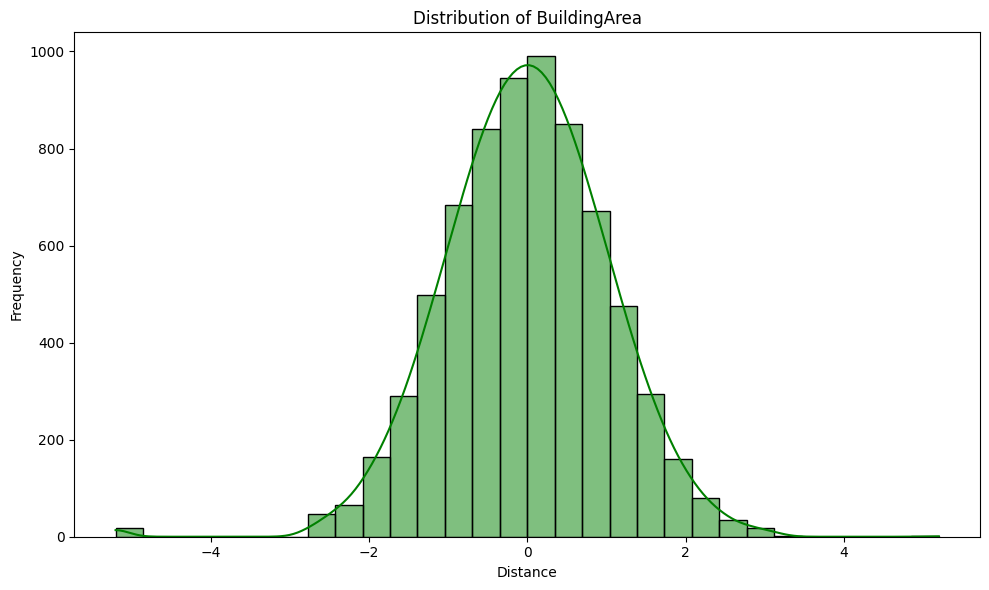

In [11]:
#Normalized plot of 'Landsize'
plt.figure(figsize=(10, 6))
sns.histplot(df['BuildingArea'], kde=True, bins=30, color='green')
plt.title('Distribution of BuildingArea')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Removing outliers
low, high = df["BuildingArea"].quantile([0.6, 0.99])
df_filtered= df[df["BuildingArea"].between(low, high)]

# Display the filtered data
print(df_filtered["LBuildingArea"].describe())


count     252.000000
mean     1384.904762
std       413.226136
min       992.000000
25%      1060.750000
50%      1192.000000
75%      1658.250000
max      2488.000000
Name: Landsize, dtype: float64


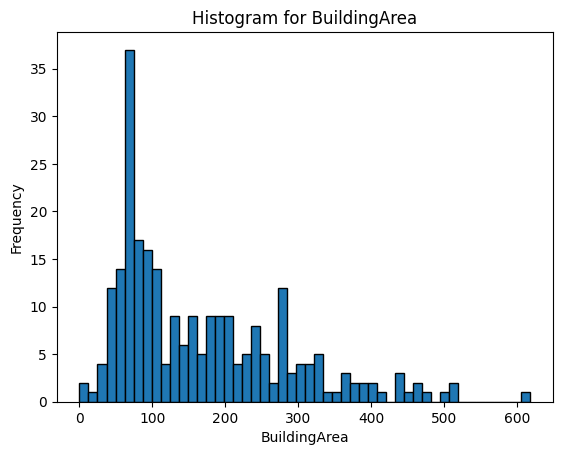

In [ ]:
#Creating box plot for "Landsize" variable (Attribute)
plt.hist(df_filtered['BuildingArea'], bins=50, edgecolor='k')
plt.title('Histogram for BuildingArea')
plt.xlabel('BuildingArea')
plt.ylabel('Frequency')
plt.show()

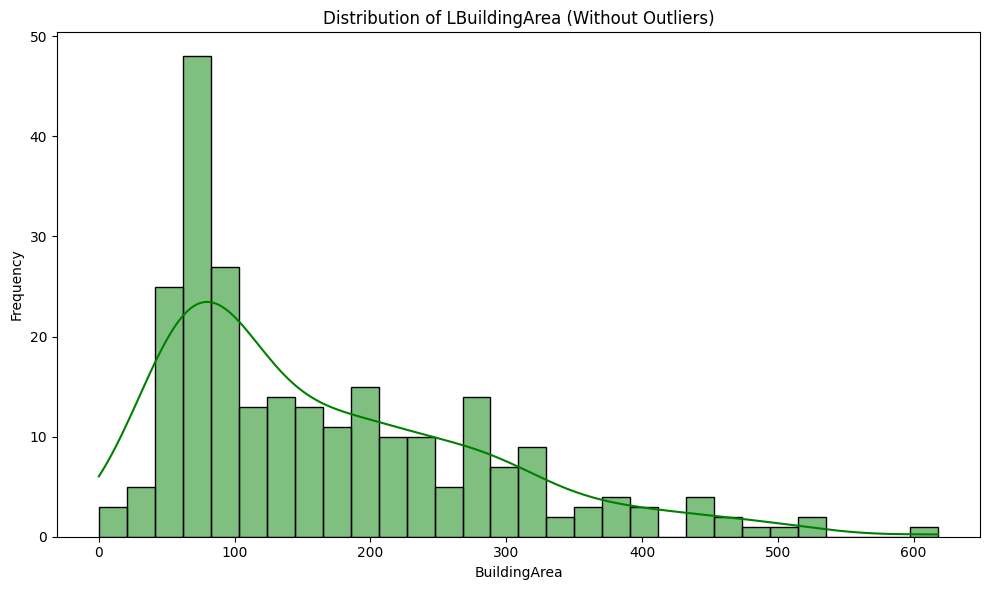

In [ ]:
#Normalized plot of 'Landsize'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BuildingArea'], kde=True, bins=30, color='green')
plt.title('Distribution of LBuildingArea (Without Outliers)')
plt.xlabel('BuildingArea')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:

print(df_filtered.head())
df_filtered.info()


    Type  Distance  BuildingArea  Lattitude             Regionname  Longitude  \
51     h      13.5         133.0   -37.7249   Western Metropolitan   144.8728   
146    h      13.8         220.0   -37.8681   Western Metropolitan   144.8190   
236    u       6.3          14.0   -37.8543  Southern Metropolitan   145.0262   
251    h       6.3         516.0   -37.8602  Southern Metropolitan   145.0130   
266    u       6.3          80.0   -37.8573  Southern Metropolitan   145.0186   

     Price_USD  
51    662300.0  
146  1317200.0  
236   543900.0  
251  4088500.0  
266   525400.0  
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 51 to 13527
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          252 non-null    object 
 1   Distance      252 non-null    float64
 2   BuildingArea  252 non-null    float64
 3   Lattitude     252 non-null    float64
 4   Regionname    252 non-null    object 
 5   Lon

In [ ]:
#analysing price according to property type
mean_price_by_type = df_filtered.groupby("Type")["Price_USD"].mean().sort_values(ascending=False)
df_filtered[["Price_USD"]].style.format("{:.0f}")
mean_price_by_type.head()

Type
h    1.535894e+06
t    7.795489e+05
u    4.262449e+05
Name: Price_USD, dtype: float64

In [ ]:
df_filtered.drop(columns="Price", inplace=True)